In [33]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

#from scipy import optimize
#from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [34]:
# try to parse the dates right at the beginning 
# it works out of the box if the date was stored ISO YYYY-MM-DD format

df_analyse=pd.read_csv('C:/ProgramData/Anaconda3/eps_covid19/data/processed/COVID_small_flat_table.csv',sep=';')  
df_analyse.sort_values('date',ascending=True).tail()

,date,Albania,India,Italy,Germany,US
231,2020-09-09,10704,4465863,281583,256433,6360212
232,2020-09-10,10860,4562414,283180,258149,6396100
233,2020-09-11,11021,4659984,284796,259735,6443652
234,2020-09-12,11185,4754356,286297,260817,6485123
235,2020-09-13,11353,4846427,287753,261737,6519573


In [35]:
df_analyse.Germany[75]

103374

In [36]:
# set some basic parameters
# beta/gamma is denoted as  'basic reproduction number'

N0=83783942 #1000000 #max susceptible population
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate


# condition I0+S0+R0=N0
I0=df_analyse.Germany[75]
S0=N0-I0
R0=0

In [37]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

In [38]:
SIR=np.array([S0,I0,R0])
SIR

array([83680568,   103374,        0], dtype=int64)

In [39]:
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recovered':R0})

In [40]:
propagation_rates

,susceptible,infected,recovered


## Simulative approach to calculate SIR curves

In [41]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recovered':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

In [42]:
SIR

array([1.29186004e+06, 5.62027622e+04, 8.24358792e+07])

In [43]:
propagation_rates.head()

,susceptible,infected,recovered
0,8.363927e+07,134335.182186,10337.400000
1,8.358563e+07,174542.952391,23770.918219
2,8.351598e+07,226740.583108,41225.213458
3,8.342557e+07,294472.684694,63899.271768
4,8.330828e+07,382310.666818,93346.540238


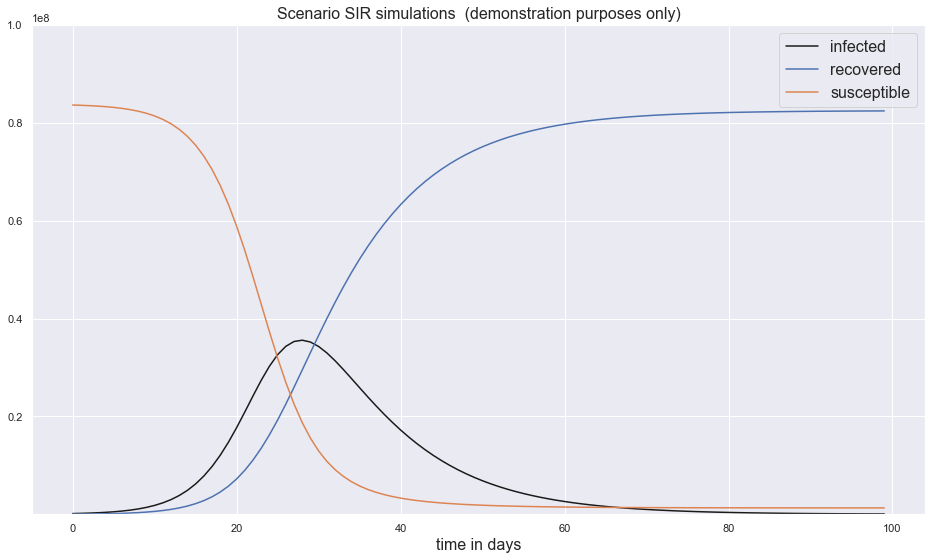

In [44]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 100000000)
ax1.set_yscale('linear')
ax1.set_title('Scenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

## Fitting the parameters of SIR model

In [45]:
from scipy import optimize
from scipy import integrate

ydata = np.array(df_analyse.Germany[75:])
t=np.arange(len(ydata))

In [46]:
ydata

array([103374, 107663, 113296, 118181, 122171, 124908, 127854, 130072,
       131359, 134753, 137698, 141397, 143342, 145184, 147065, 148291,
       150648, 153129, 154999, 156513, 157770, 158758, 159912, 161539,
       163009, 164077, 164967, 165664, 166152, 167007, 168162, 169430,
       170588, 171324, 171879, 172576, 173171, 174098, 174478, 175233,
       175752, 176369, 176551, 177778, 178473, 179021, 179710, 179986,
       180328, 180600, 181200, 181524, 182196, 182922, 183189, 183410,
       183594, 183879, 184121, 184472, 184924, 185450, 185750, 186109,
       186506, 186522, 186691, 187226, 187267, 187518, 187682, 188252,
       188604, 189817, 190299, 190670, 191272, 191768, 192480, 192871,
       193371, 194036, 194458, 194693, 195042, 195418, 195893, 196370,
       196780, 197198, 197523, 198064, 198343, 198699, 199001, 199332,
       199709, 199919, 200180, 200456, 200890, 201450, 202045, 202426,
       202735, 203325, 203717, 204276, 204881, 205623, 206278, 206667,
      

In [47]:
t

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160])

In [48]:
# ensure re-initialization 
I0=ydata[0]
S0=N0-I0
R0=0
beta

0.4

In [49]:
I0

103374

In [50]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [51]:
def fit_odeint(t, beta, gamma): #t==x?
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [52]:
# example curve of our differential equationa
popt=[0.4,0.1]
fit_odeint(t, *popt)

array([1.03374000e+05, 1.39456227e+05, 1.88082416e+05, 2.53572263e+05,
       3.41699406e+05, 4.60153461e+05, 6.19126597e+05, 8.32039681e+05,
       1.11640756e+06, 1.49480900e+06, 1.99586138e+06, 2.65498745e+06,
       3.51458509e+06, 4.62297092e+06, 6.03120847e+06, 7.78679006e+06,
       9.92339659e+06, 1.24469955e+07, 1.53205979e+07, 1.84526563e+07,
       2.16957767e+07, 2.48608617e+07, 2.77460403e+07, 3.01722374e+07,
       3.20131488e+07, 3.32100361e+07, 3.37692241e+07, 3.37471684e+07,
       3.32307267e+07, 3.23189387e+07, 3.11095508e+07, 2.96908380e+07,
       2.81377868e+07, 2.65112486e+07, 2.48588191e+07, 2.32165324e+07,
       2.16108037e+07, 2.00603014e+07, 1.85776063e+07, 1.71706064e+07,
       1.58436330e+07, 1.45983654e+07, 1.34345392e+07, 1.23504963e+07,
       1.13436054e+07, 1.04105829e+07, 9.54773502e+06, 8.75113839e+06,
       8.01677436e+06, 7.34062692e+06, 6.71875319e+06, 6.14733281e+06,
       5.62270147e+06, 5.14137237e+06, 4.70004863e+06, 4.29562895e+06,
      

In [53]:
# the resulting curve has to be fitted
# free parameters are here beta and gamma

In [54]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

standard deviation errors :  [0.00553402 0.00528182]  start infect: 103374
Optimal parameters: beta = 0.18163346079420142  and gamma =  0.17130679039738228


In [55]:
popt

array([0.18163346, 0.17130679])

In [56]:
pcov

array([[3.06254314e-05, 2.92259504e-05],
       [2.92259504e-05, 2.78976243e-05]])

In [57]:
# get the final fitted curve
fitted=fit_odeint(t, *popt)

In [58]:
fitted

array([103374.        , 104421.50634213, 105475.29664018, 106535.3042079 ,
       107601.45938758, 108673.68951109, 109751.91886266, 110836.06863919,
       111926.05691264, 113021.79859323, 114123.20540124, 115230.18583195,
       116342.6451146 , 117460.48518332, 118583.60464767, 119711.89877195,
       120845.25943423, 121983.57510131, 123126.73080277, 124274.60811632,
       125427.08513903, 126584.03645985, 127745.3331416 , 128910.84270753,
       130080.42913855, 131253.9528353 , 132431.27061134, 133612.2356821 ,
       134796.69767438, 135984.5026042 , 137175.49286746, 138369.50723988,
       139566.38088449, 140765.94536315, 141968.02861807, 143172.4549855 ,
       144379.04520599, 145587.61646091, 146797.98235539, 148009.9529361 ,
       149223.33471255, 150437.93067624, 151653.54035043, 152869.95984264,
       154086.98180476, 155304.39549346, 156521.98680522, 157739.53831498,
       158956.82936349, 160173.63606126, 161389.73132716, 162604.88495039,
       163818.86364316, 1

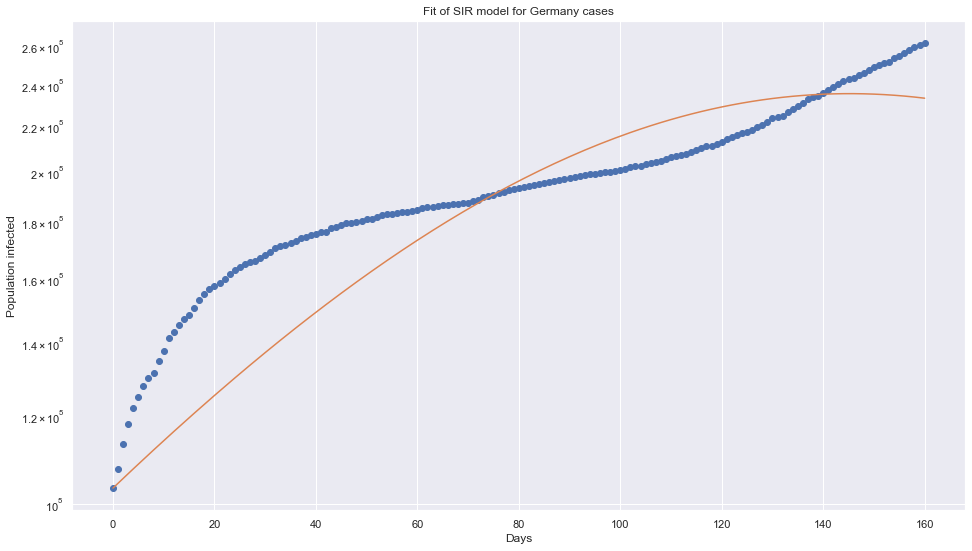

Optimal parameters: beta = 0.18163346079420142  and gamma =  0.17130679039738228
Basic Reproduction Number R0  1.060281734149967
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [59]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")

## Dynamic beta in SIR (infection rate)

In [60]:
t_initial=28
t_intro_measures=14
t_hold=21
t_relax=21

beta_max=0.4
beta_min=0.11
gamma=0.1
pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max,beta_min,t_intro_measures),
                       np.array(t_hold*[beta_min]),
                       np.linspace(beta_min,beta_max,t_relax),
                       ))


In [61]:
pd_beta

array([0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.37769231,
       0.35538462, 0.33307692, 0.31076923, 0.28846154, 0.26615385,
       0.24384615, 0.22153846, 0.19923077, 0.17692308, 0.15461538,
       0.13230769, 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.1245    ,
       0.139     , 0.1535    , 0.168     , 0.1825    , 0.197     ,
       0.2115    , 0.226     , 0.2405    , 0.255     , 0.2695 

In [62]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_beta in pd_beta:
   
    new_delta_vec=SIR_model(SIR,each_beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

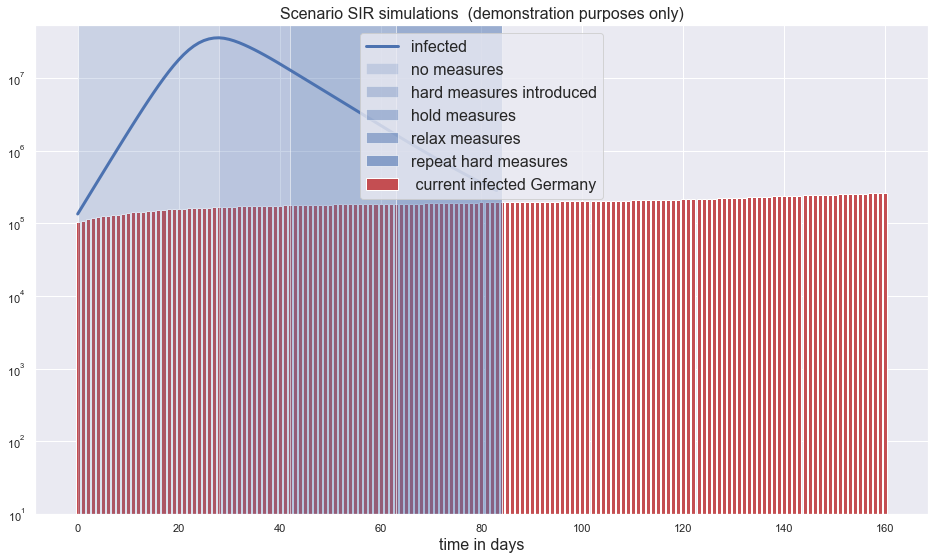

In [63]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',linewidth=3)
#ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
#ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()

ax1.bar(np.arange(len(ydata)),ydata, width=0.8,label=' current infected Germany',color='r')
ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
ax1.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='hard measures introduced')
ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
ax1.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='relax measures')
ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repeat hard measures')



ax1.set_ylim(10, 1.5*max(propagation_rates.infected))
ax1.set_yscale('log')
ax1.set_title('Scenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

In [64]:
t_phases

array([28, 42, 63, 84], dtype=int32)